# Kmeans Clustering for Online Retail dataset

In [1]:
#import libraries

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from matplotlib import cm


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

from mpl_toolkits.mplot3d import Axes3D


In [2]:
# import UCI public dataset Online Retail
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [4]:
df.dropna()
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


# Customer Segmentation

In [5]:
# Segement customers based on their spending
# Need purchase frequency, total spending for each customer (ID)

df['Order_Total'] = df['Quantity']*df['UnitPrice']
Orders = pd.DataFrame(df.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count())
Orders.columns = ['CustomerID', 'Orders']
Spending = pd.DataFrame(df.groupby(by='CustomerID', as_index=False)['Order_Total'].sum())
Spending.columns = ['CustomerID', 'Total_Spending']
Items = pd.DataFrame(df.groupby(by='CustomerID', as_index=False)['Quantity'].sum())
Items.columns = ['CustomerID', 'Total_Items']

In [6]:
# creating new dataframe
customer_df= Orders.merge(Spending, how="inner", on = "CustomerID")
customer_df= customer_df.merge(Items, how="inner", on = "CustomerID")

In [7]:
customer_df.head()

,CustomerID,Orders,Total_Spending,Total_Items
0,12346.00,2,0.00,0
1,12347.00,182,4310.00,2458
2,12348.00,31,1797.24,2341
3,12349.00,73,1757.55,631
4,12350.00,17,334.40,197


In [8]:
customer_df.describe()

,CustomerID,Orders,Total_Spending,Total_Items
count,4372.00,4372.00,4372.00,4372.00
mean,15299.68,93.05,1898.46,1122.34
std,1722.39,232.47,8219.35,4672.79
min,12346.00,1.00,-4287.63,-303.00
25%,13812.75,17.00,293.36,153.00
50%,15300.50,42.00,648.08,365.00
75%,16778.25,102.00,1611.72,962.25
max,18287.00,7983.00,279489.02,196719.00


In [9]:
X= customer_df.iloc[:,1:]
X2= customer_df.iloc[:,1:3]

### Elbow method to find K number of clusters

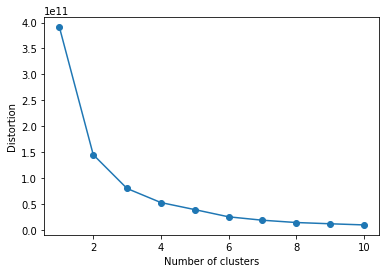

In [10]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10,
                max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [11]:
#the elbow is located at k=3, so k=3 is a good choice

### Kmeans Clustering k=3

In [12]:

km = KMeans(n_clusters=3,init='k-means++', n_init=10, max_iter=300,
            tol=1e-04, random_state=0)
km.fit(X)
clusters = km.predict(X)

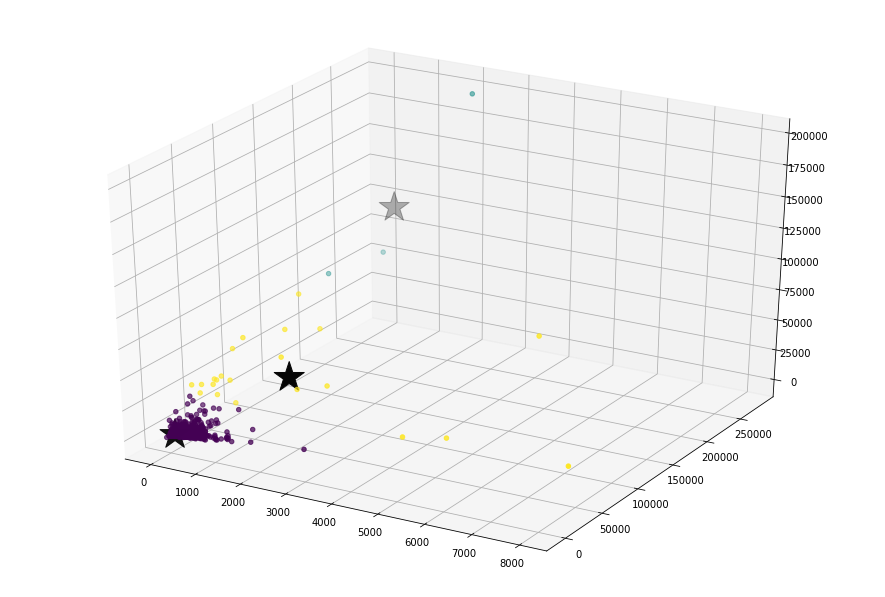

In [13]:
from mpl_toolkits.mplot3d import Axes3D

C = km.cluster_centers_

plt.rcParams['figure.figsize'] = (12, 8)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X.iloc[:, 0],X.iloc[:, 1], X.iloc[:, 2], c=clusters)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

### Plot

In [14]:
km.fit(X2)
clusters = km.predict(X2)

In [15]:
customer_df['Cluster'] = km.labels_
customer_df.head()

,CustomerID,Orders,Total_Spending,Total_Items,Cluster
0,12346.00,2,0.00,0,0
1,12347.00,182,4310.00,2458,0
2,12348.00,31,1797.24,2341,0
3,12349.00,73,1757.55,631,0
4,12350.00,17,334.40,197,0


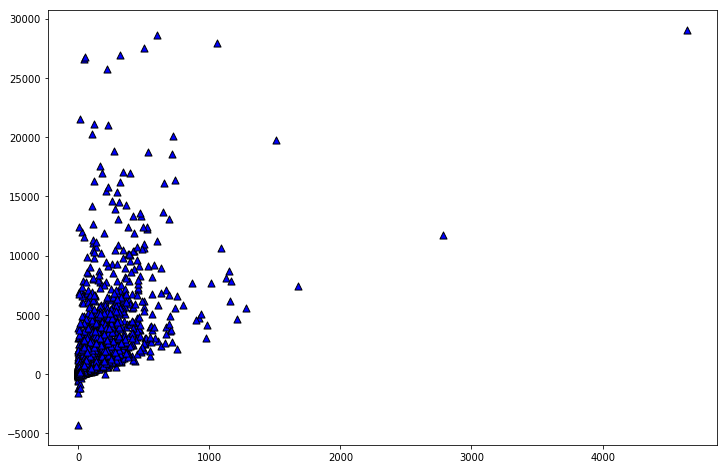

In [16]:
plt.scatter(customer_df.iloc[clusters == 0, 1],customer_df.iloc[clusters ==0, 2],
            s=50, c='blue', marker='^',
            edgecolor='black',label='cluster 1')

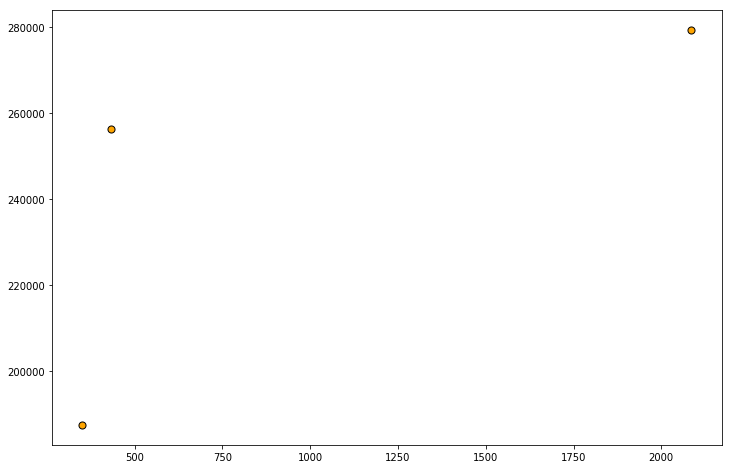

In [17]:
plt.scatter(customer_df.iloc[clusters == 1, 1],customer_df.iloc[clusters == 1, 2],
            s=50, c='orange', marker='o',
            edgecolor='black',label='cluster 2')

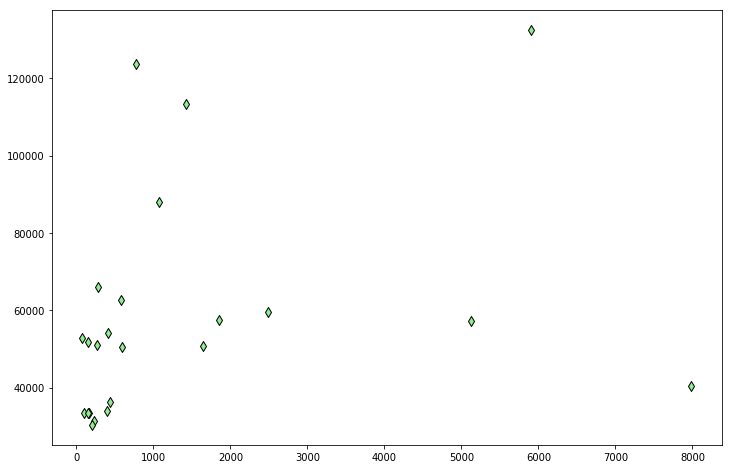

In [18]:
plt.scatter(customer_df.iloc[clusters == 2, 1],customer_df.iloc[clusters == 2, 2],
            s=50, c='lightgreen', marker='d',
            edgecolor='black',label='cluster 3')

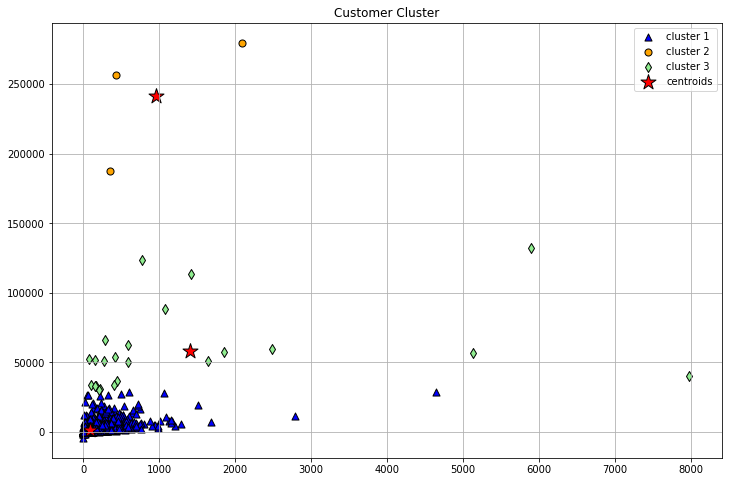

In [19]:
plt.scatter(customer_df.iloc[clusters == 0, 1],customer_df.iloc[clusters == 0, 2],
            s=50, c='blue', marker='^',
            edgecolor='black',label='cluster 1')

plt.scatter(customer_df.iloc[clusters == 1, 1],customer_df.iloc[clusters == 1, 2],
            s=50, c='orange', marker='o',
            edgecolor='black',label='cluster 2')

plt.scatter(customer_df.iloc[clusters == 2, 1],customer_df.iloc[clusters == 2, 2],
            s=50, c='lightgreen', marker='d',
            edgecolor='black',label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', 
            edgecolor='black',label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.title("Customer Cluster")
plt.show()


### Silhouette plots of clustering quality

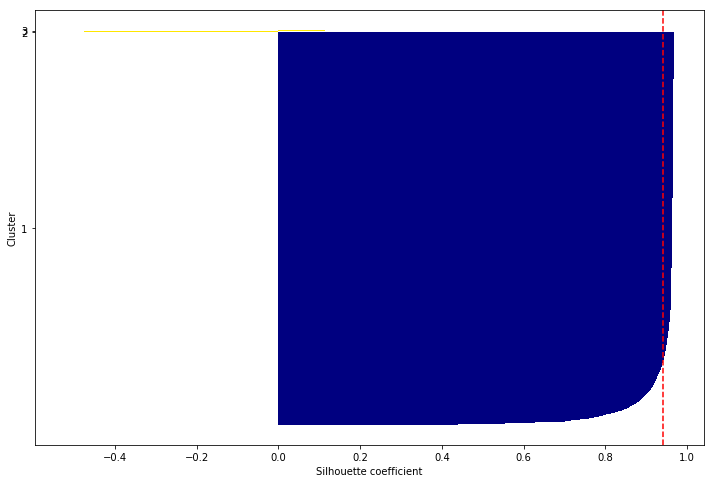

In [20]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X2)
clusters = km.predict(X2)
cluster_labels = np.unique(clusters)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaler.transform(X2), clusters, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,
             height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [21]:
#silhouette coefficients close to 1 indicates a good clustering